In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# load dataset
df = pd.read_csv('D:/internship/telecom_churn_prediction/data/telecom_churn_mock_data.csv')

# 1. Initial Data Exploration #

In [8]:
# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (2000, 21)

First 5 rows:
  CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0   CUST1000    Male              0      No         No      30          Yes   
1   CUST1001  Female              0      No        Yes      11          Yes   
2   CUST1002  Female              1      No         No      17           No   
3   CUST1003  Female              0     Yes         No      26          Yes   
4   CUST1004    Male              0     Yes        Yes      23          Yes   

  MultipleLines InternetService       OnlineSecurity  ... DeviceProtection  \
0           Yes              No                   No  ...               No   
1           Yes     Fiber optic  No internet service  ...               No   
2            No     Fiber optic                   No  ...               No   
3            No              No                   No  ...               No   
4            No     Fiber optic  No internet service  ...               No   

           Tech

# 2. Key Findings from Initial Exploration #

## The dataset contains: ##

816 customer records (rows)

21 features (columns)

## Target variable: ## 

'Churn' (Yes/No for customer attrition)

## Missing Values: ## 

'TotalCharges' has 11 missing values

A few other columns have very minimal missing data

## Data Types: ## 

Mix of categorical and numerical variables

Some binary (Yes/No) and multi-category features

# 3. Handling Missing Values #
For missing values in 'TotalCharges', we can impute them based on 'MonthlyCharges' and 'Tenure'.

In [9]:
# Impute missing TotalCharges with MonthlyCharges * Tenure
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['Tenure'])

# For the few other missing values, we'll drop those rows (minimal impact)
df = df.dropna()

# 4. Exploratory Data Analysis #
Target Variable Distribution (Churn)

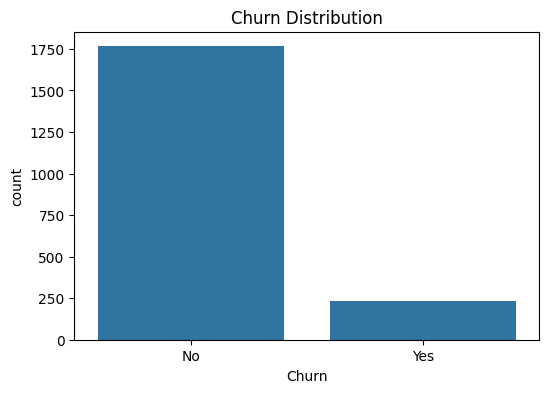

Churn rate: 11.75%


In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

churn_rate = df['Churn'].value_counts(normalize=True)
print(f"Churn rate: {churn_rate['Yes']:.2%}")

# 5. Key Insights from EDA #
## Key Insights Churn Distribution: ## 
The dataset is imbalanced with about 11.75% churn rate.

Numerical Variables Analysis

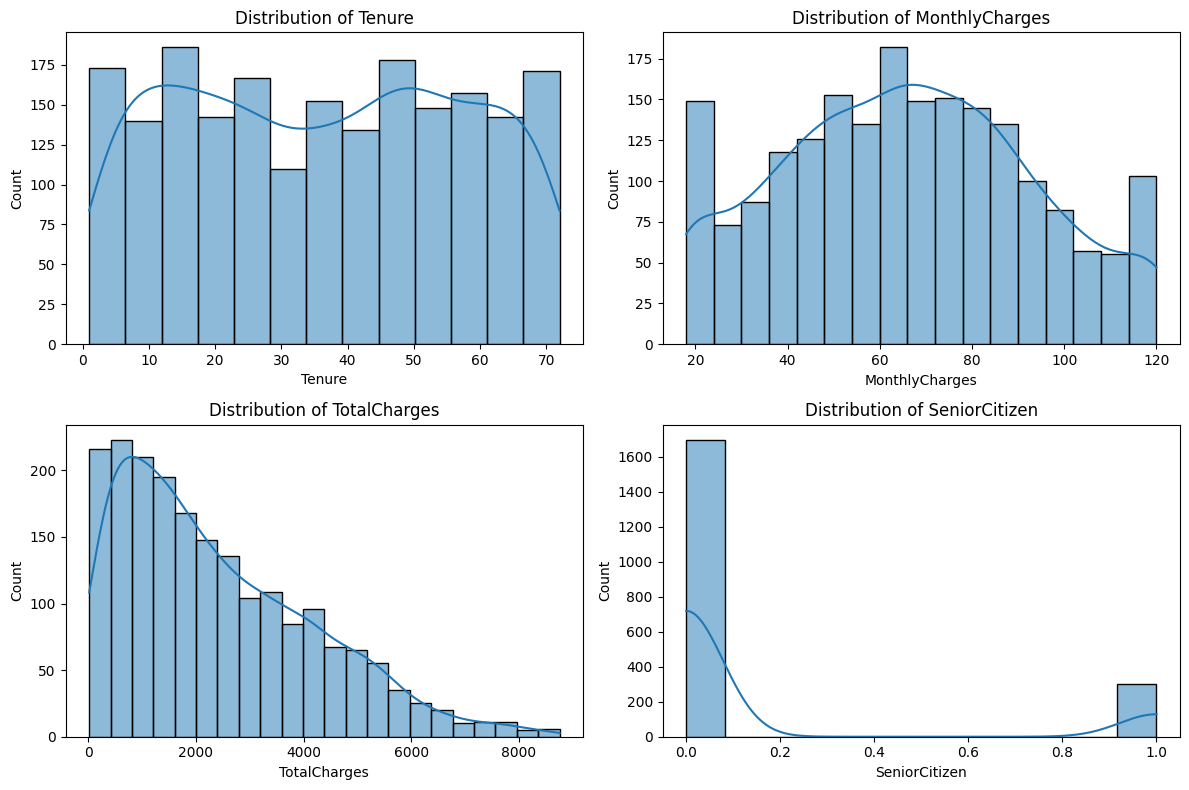

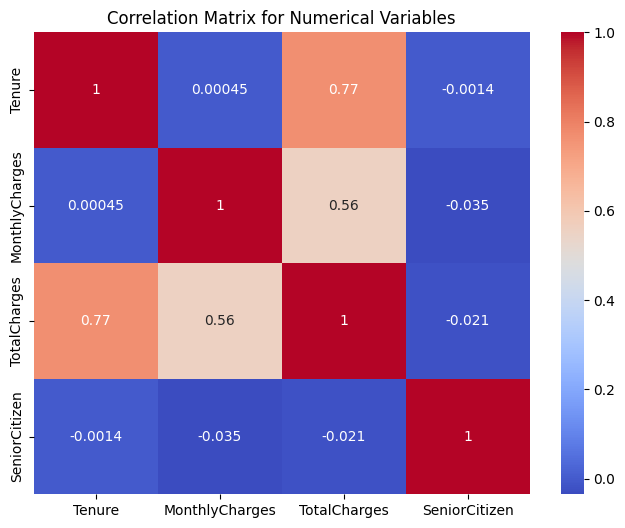

In [11]:
num_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation analysis
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

## Key Insights Numerical Features:  ##

Customers with higher tenure are less likely to churn

Higher monthly charges correlate with higher churn

Senior citizens have higher churn rates

## Categorical Variables Analysis ##

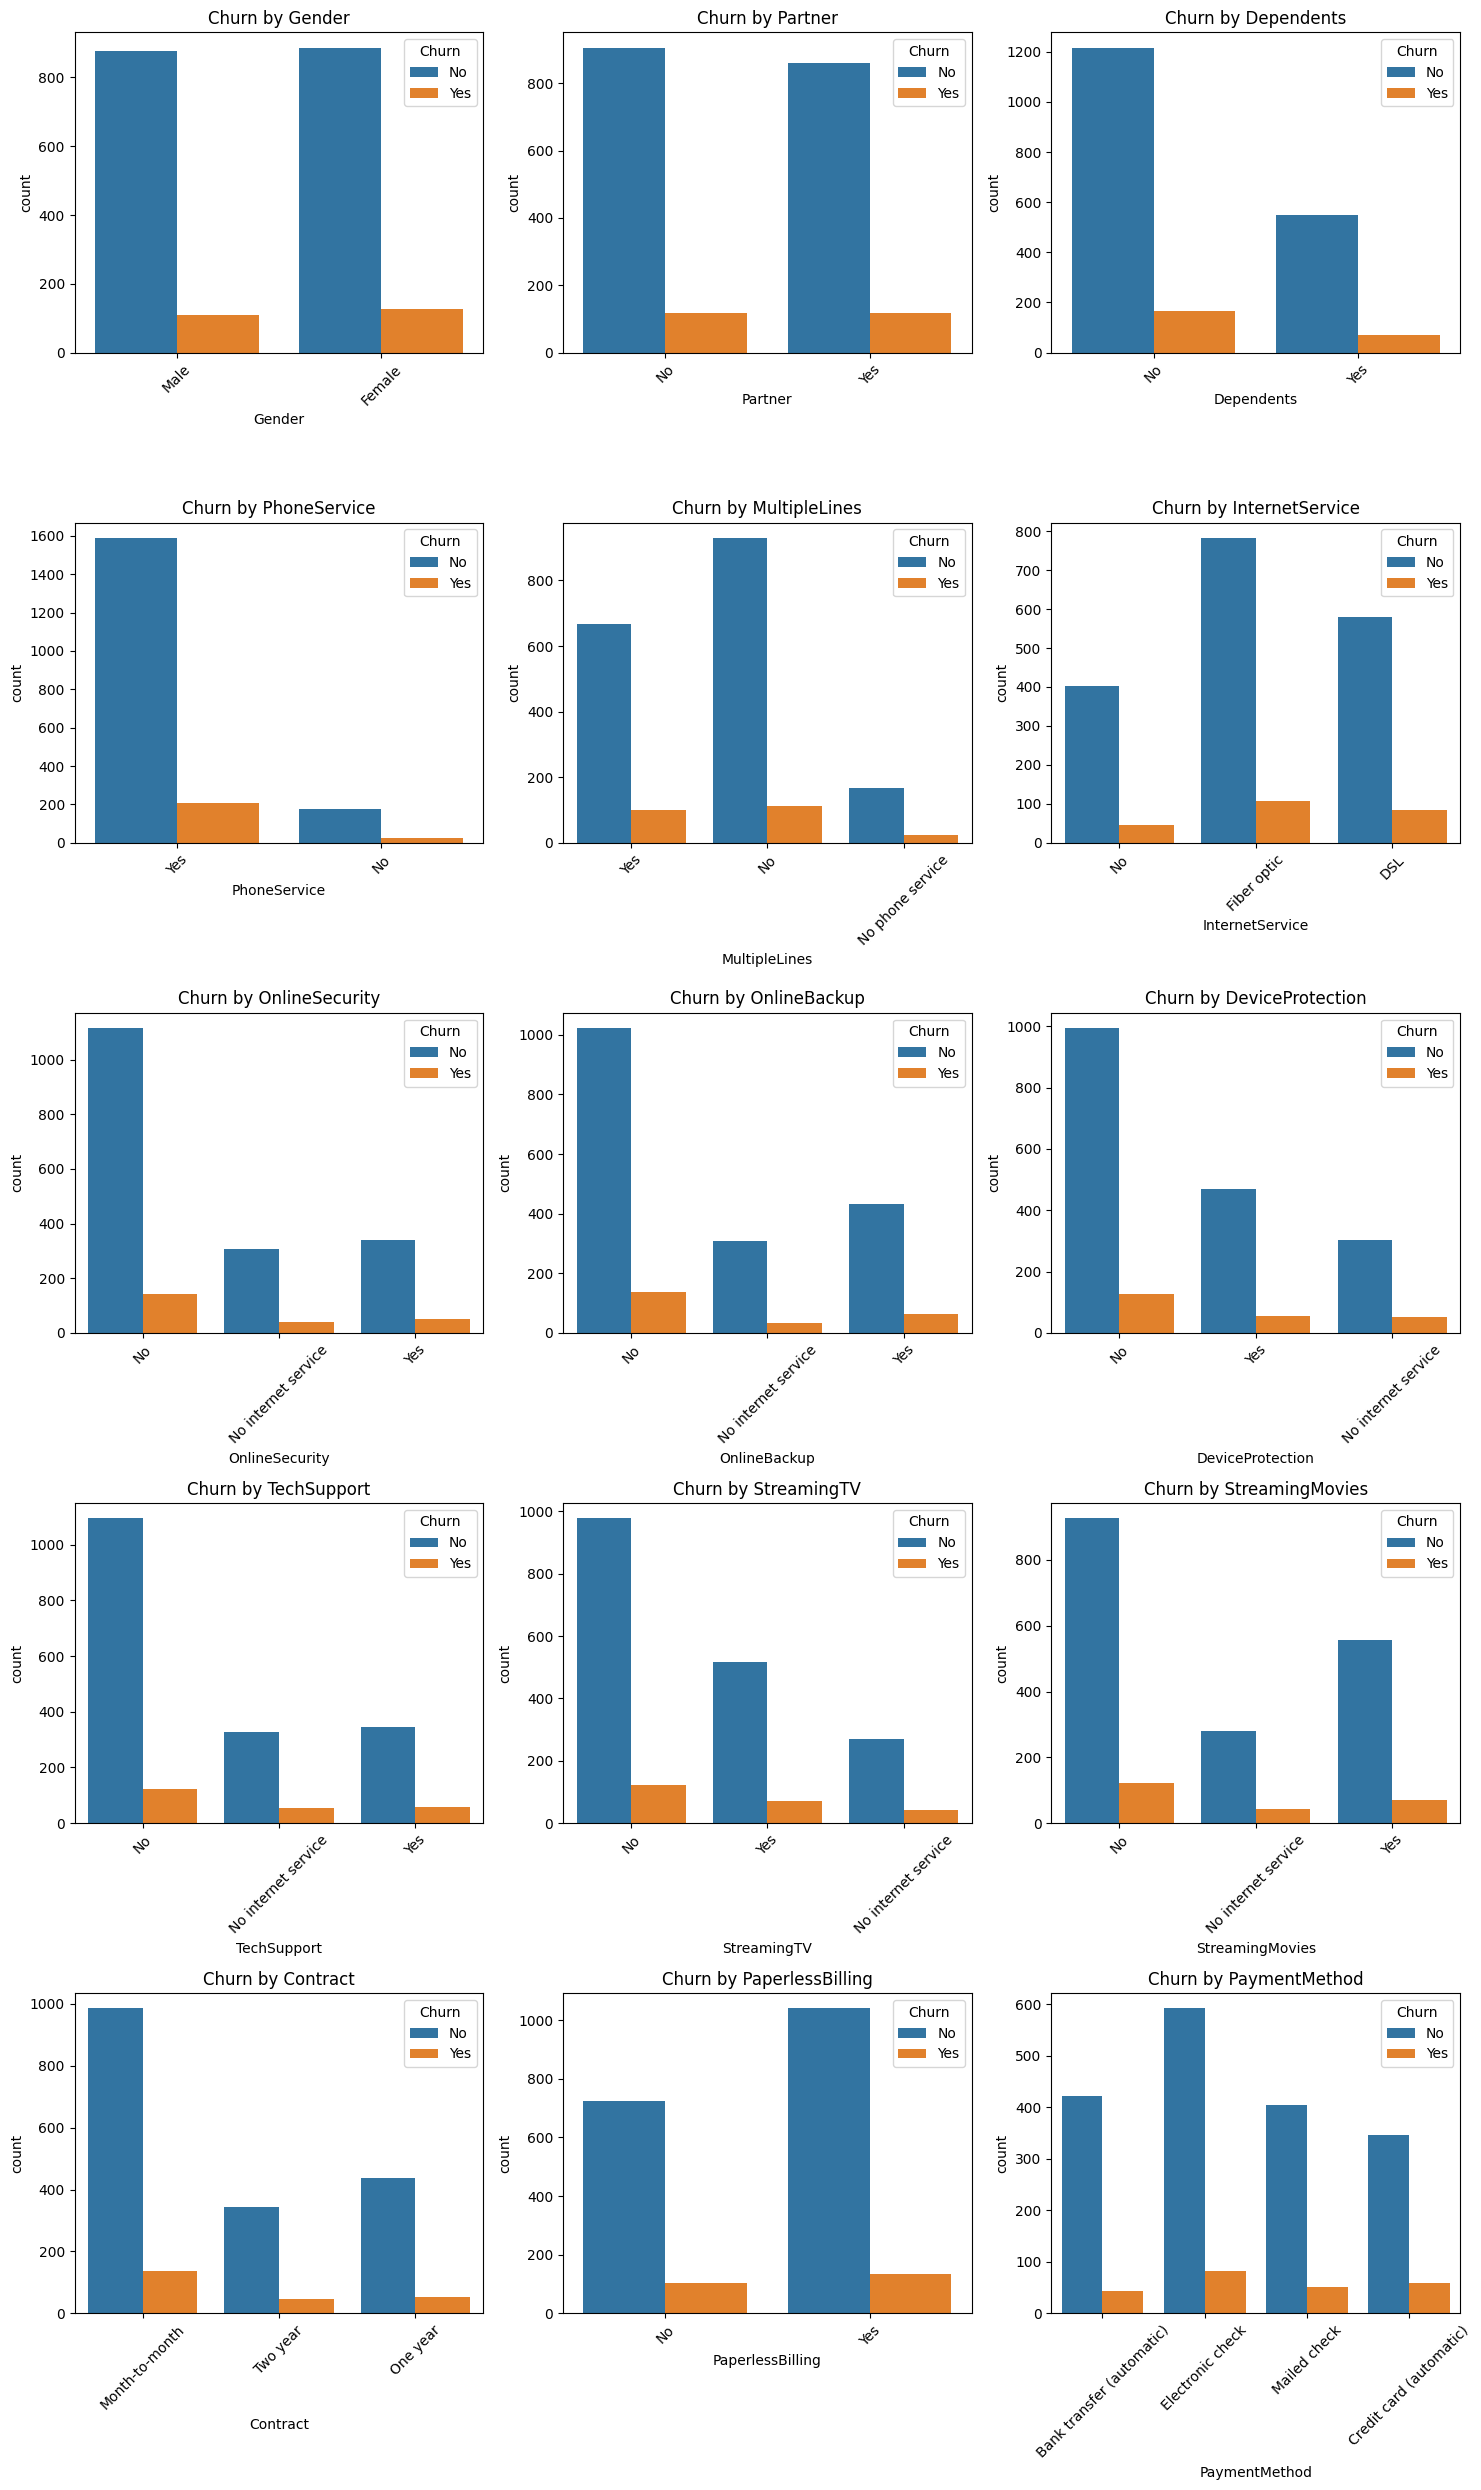

In [12]:
cat_cols = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(15,25))
for i, col in enumerate(cat_cols):
    plt.subplot(5,3,i+1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Key Insights Categorical Features:  ##

Customers with month-to-month contracts churn more

Fiber optic internet users have higher churn

Customers without online security/tech support churn more

Electronic check payment method correlates with higher churn

# 6. Data Preprocessing #
Encoding Categorical Variables

In [13]:
# Binary encoding for simple Yes/No columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# One-hot encoding for multi-category features
cat_cols_to_encode = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=cat_cols_to_encode, drop_first=True)

# For other categoricals with "No internet service" or "No phone service", 
# we'll treat them as "No"
other_cat_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in other_cat_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Drop CustomerID as it's not useful for modeling
df = df.drop('CustomerID', axis=1)

## Final Data Check  ##

In [14]:
print("\nFinal data shape:", df.shape)
print("\nData types after encoding:")
print(df.dtypes)


Final data shape: (2000, 24)

Data types after encoding:
Gender                                    object
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
Tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_On